Import packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Exercise 2: load 2 files as dataframes

In [2]:


df_dmn = pd.read_csv("aau1043_dnm.tsv")
df_parental_age = pd.read_csv("aau1043_parental_age.tsv")



Exercise 3: Count number of de-novo mulations

In [20]:
#print(df_dmn["Proband_id"])
#fields = df_dmn[["Proband_id", "Phase_combined"]]
father_df = df_dmn.loc[df_dmn["Phase_combined"] == "father"]
mother_df = df_dmn.loc[df_dmn["Phase_combined"] == "mother"]


father_counts = father_df["Proband_id"].value_counts().sort_index()
mother_counts = mother_df["Proband_id"].value_counts().sort_index()

#convert series to dataframes
father_count_df = father_counts.to_frame()
mother_count_df = mother_counts.to_frame()

#place proband_IDs into their own columns instead of as index
father_count_df = father_count_df.reset_index()
mother_count_df = mother_count_df.reset_index()

#rename columns
father_count_df = father_count_df.rename(columns = {"index":"Proband_id","Proband_id":"pat_dnm"})
mother_count_df = mother_count_df.rename(columns = {"index":"Proband_id","Proband_id":"mat_dnm"})

merged_df = pd.merge(father_count_df, mother_count_df)

pat_dnm = merged_df["pat_dnm"]
mat_dnm = merged_df["mat_dnm"]

total_dnm = pat_dnm + mat_dnm

merged_df = pd.concat((merged_df, total_dnm), axis = 1)

merged_df = merged_df.rename(columns = {0:"total_dnm"})

print(merged_df)

      index  Proband_id
0       675          51
1      1097          26
2      1230          42
3      1481          53
4      1806          61
..      ...         ...
391  153657          41
392  154565          61
393  154621          39
394  154810          55
395  154936          36

[396 rows x 2 columns]
      index  Proband_id
0       675          19
1      1097          12
2      1230          12
3      1481          14
4      1806          11
..      ...         ...
391  153657           8
392  154565          14
393  154621          11
394  154810          14
395  154936          16

[396 rows x 2 columns]
     Proband_id  pat_dnm  mat_dnm  total_dnm
0           675       51       19         70
1          1097       26       12         38
2          1230       42       12         54
3          1481       53       14         67
4          1806       61       11         72
..          ...      ...      ...        ...
391      153657       41        8         49
392      154565 

Exercise 4: Merge dnm with parental age

In [5]:
final_merged_df = pd.merge(merged_df, df_parental_age)
print(final_merged_df)

     Proband_id  pat_dnm  mat_dnm  total_dnm  Father_age  Mother_age
0           675       51       19         70          31          36
1          1097       26       12         38          19          19
2          1230       42       12         54          30          28
3          1481       53       14         67          32          20
4          1806       61       11         72          38          34
..          ...      ...      ...        ...         ...         ...
391      153657       41        8         49          27          23
392      154565       61       14         75          36          30
393      154621       39       11         50          19          18
394      154810       55       14         69          32          28
395      154936       36       16         52          30          34

[396 rows x 6 columns]


Exercise 5: Plot Mutations vs Age

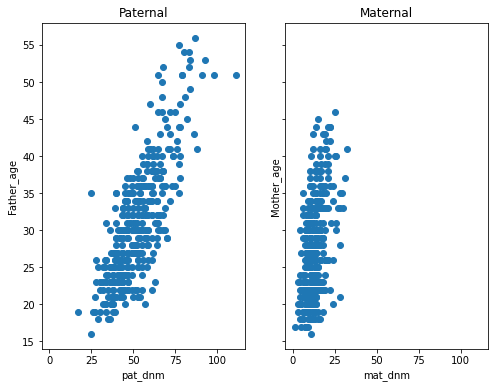

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 6), sharex = True, sharey = True)
ax1.scatter(final_merged_df["pat_dnm"],final_merged_df["Father_age"] )
ax2.scatter(final_merged_df["mat_dnm"], final_merged_df["Mother_age"])

ax1.set_title("Paternal")
ax1.set_ylabel("Father_age")
ax1.set_xlabel("pat_dnm")

ax2.set_title("Maternal")
ax2.set_ylabel("Mother_age")
ax2.set_xlabel("mat_dnm")

plt.show()

Exercise 6: Ordinary Least Squares on Mother

In [33]:
model = smf.ols(formula = 'mat_dnm ~  Mother_age' , data = final_merged_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:50:45   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- the relationship is significant with: Prob (F-statistic):	6.88e-24
- the size of the relationship is 0.3776 (0.3776 new dnm per year of age)

Exercise 7: Ordinary Least Squares on Father

In [34]:
model = smf.ols(formula = 'pat_dnm ~ Father_age' , data = final_merged_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:50:51   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- the relationship is significant with: Prob (F-statistic):	1.55e-84
- the size of the relationship is 1.3538 (1.3538 new dnm per year of age)


Exercise 8: Histogram of de-novo mutations

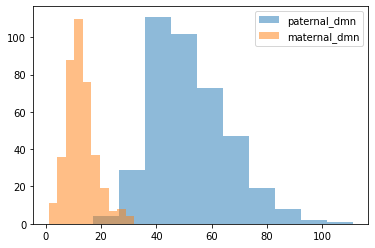

In [53]:
# create a histogram of flipper lengths
fig, ax = plt.subplots()
ax.hist(final_merged_df["pat_dnm"],label = "paternal_dmn", alpha = 0.5)
ax.hist(final_merged_df["mat_dnm"],label = "maternal_dmn", alpha = 0.5)
plt.legend()
plt.show()

Exercise 9: Significance with T-Test

In [29]:
# from scipy import stats
# independent t-test using scipy ttest_ind() function
stats.ttest_ind(final_merged_df["pat_dnm"], 
                final_merged_df["mat_dnm"])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

Exercise 10: Poisson Regression

In [36]:
model = smf.poisson(formula = 'mat_dnm ~ Mother_age' , data = final_merged_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:51:02   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [35]:
model = smf.poisson(formula = 'pat_dnm ~ Father_age' , data = final_merged_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:50:57   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

Exercise 11

In [55]:
import math
#take coefficients from paternal poisson regression results
math.exp(3.190257+0.024096*50.5)

82.03163782612788